In [62]:
import pandas as pd
# make sure u have scikit-learn installed
# or run 'pip install scikit-learn'
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier is imported from scikit-learn - it's a machine learning algorithm that creates a decision tree for classification

# lood the data set 
musics = pd.read_csv('music.csv')
# musics

In [63]:
# split data into features and target
x = musics.drop(columns=["genre"]) 
y = musics["genre"]
# y

In [64]:
# train model
model = DecisionTreeClassifier()
model.fit(x,y)

# predict using a dataframe with the same features name
my_predict = model.predict(pd.DataFrame([[106,1]], columns = x.columns))
print(my_predict)

['Classical']


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.preprocessing import LabelEncoder # for convert text  labels to number


# create label encoder object to convert text labels to number 

label_encoder = LabelEncoder()

y_encoder = label_encoder.fit_transform(y);

# split data in train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y_encoder, test_size = 0.2, random_state=42);
# create decision tree classifier object 
model = DecisionTreeClassifier()
# train model using traing data

model.fit(x_train, y_train)

# make prediction on test data
# y_predict = model.predict(x_test)
y_predict = model.predict(x_test)

#convert numeric prediction back to genre lables
y_pred_labels = label_encoder.inverse_transform(y_predict)
# print(x_test)
print(y_pred_labels)

['HipHop' 'HipHop' 'Classical' 'Jazz']


In [73]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    mean_absolute_error, mean_squared_error, r2_score
)
import numpy as np

# Assuming y_test and y_predict are defined correctly
# Ensure y_test and y_predict are consistent in length

# Accuracy
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_test, y_predict, average='macro')
print(f"Precision: {precision * 100:.2f}%")

# Recall
recall = recall_score(y_test, y_predict, average='macro')
print(f"Recall: {recall * 100:.2f}%")

# F1 Score
f1 = f1_score(y_test, y_predict, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R Squared Score
r2 = r2_score(y_test, y_predict)
print(f"R Squared (R2) Score: {r2:.2f}")

# Adjusted R Squared Score
n = len(y_test)  # Number of samples
p = x_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R Squared Score: {adjusted_r2:.2f}")


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
R Squared (R2) Score: 1.00
Adjusted R Squared Score: 1.00


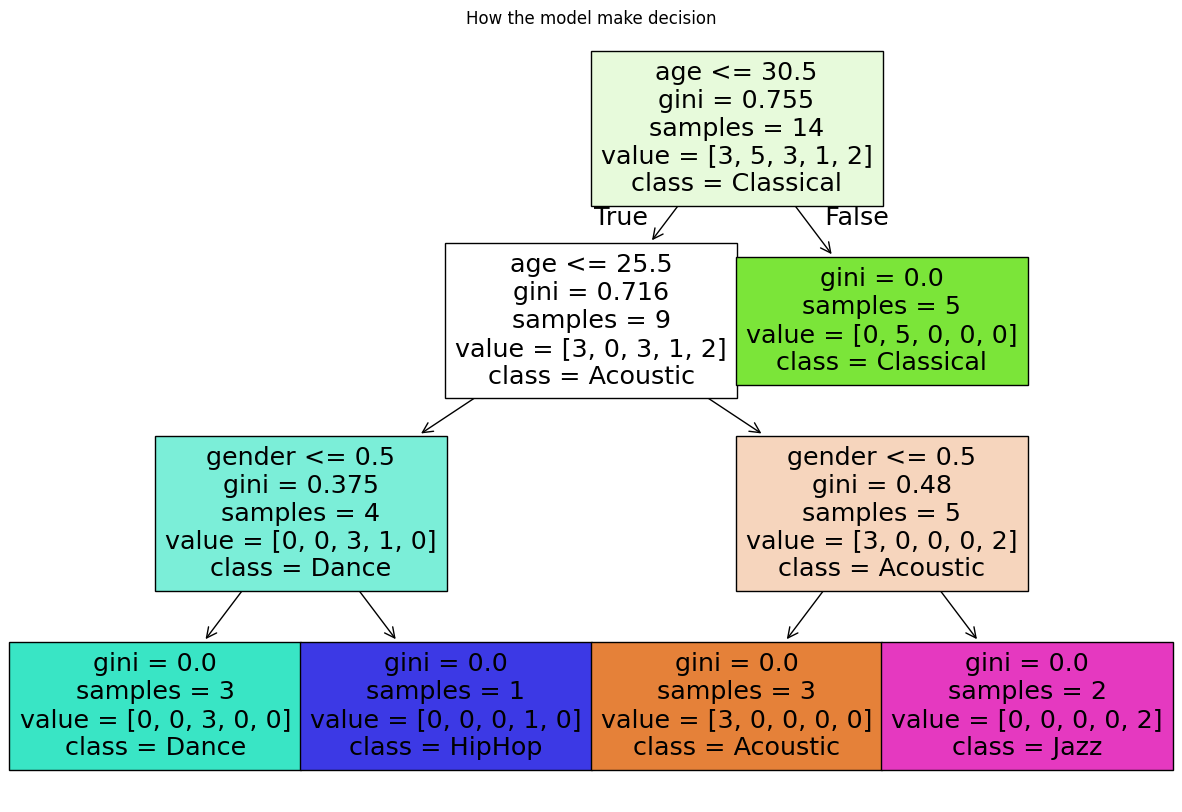

In [81]:

# modle intrepretation
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualise  descion tree 
plt.figure(figsize = (15,10))
plot_tree(model,
         feature_names =['age', 'gender'],
          class_names= label_encoder.classes_,
          filled = True
         )
plt.title("How the model make decision")
plt.show()
